In [1]:
import json
import requests
from collections import Counter
import time
import itertools
from itertools import chain, repeat
import matplotlib.pyplot as plt

from googletrans import Translator
# translator = Translator()
# translations = translator.translate("omlete", dest = "en", src = "lv")
# print(translations)

In [2]:


def valid_letters(x):
   return x[0].lower() in 'id'

def get_recipes():
    prompts = chain(["Recipes search: if ingredient, press 'i', if 'dish' press 'd': "], repeat("Not a letter 'i' or 'd'! Try again: "))
    replies = map(input, prompts)
    valid_response = next(filter(valid_letters, replies))
    response = str(valid_response.lower())

    if response == 'i':
        search_input = str(input("Please enter ingredient/s what to search, separate by ',' ? "))
    else:
        search_input = str(input("Please enter dish what to search? "))
    search_what = search_input.strip().lower()
    start_page = int(input("Please enter start page number : "))
    end_page = int(input("Please enter end page number > start page : "))
    print(search_what, start_page, end_page)

    pages = range(start_page, end_page)
    recipes = []
    for page in pages:
        if response == 'i':
            page = "http://www.recipepuppy.com/api/?i="+ search_what + "&p=" + str(page)
        else:
            page = "http://www.recipepuppy.com/api/?q=" + search_what + "&p=" + str(page)
        print(f"Opened url: {page}")
        resp = requests.get(page)
        
        if resp.status_code != 200:
            print("Bad response: ", resp.status_code)
        recipes += resp.json()['results']
        time.sleep(0.9)
    return recipes

def merged_ingr_list(recipes):
    
    ingrd_list = [k['ingredients'].split(", ") for k in recipes] # dabonu visus ingredientus, bet daudzos listos
    merged_ingrd_list = list(itertools.chain.from_iterable(ingrd_list)) # samergoju visus listus vienā
    return merged_ingrd_list

In [3]:
# 1a. Izvelciet 10 receptes kas satur kartupeļus no sekojoša API:
# http://www.recipepuppy.com/about/api/
# Dati jasaglabā .json failā bet arī jaizveido python datu struktūra


with open("10_recipes.json", mode = "w") as write_file:
    json.dump(list(enumerate(get_recipes(), 1)), write_file, indent = 4)
print("Created file 10_recipes.json")

Recipes search: if ingredient, press 'i', if 'dish' press 'd': potato
Not a letter 'i' or 'd'! Try again: i
Please enter ingredient/s what to search, separate by ',' ? potato,cheese
Please enter start page number : 2
Please enter end page number > start page : 4
potato,cheese 2 4
Opened url: http://www.recipepuppy.com/api/?i=potato,cheese&p=2
Opened url: http://www.recipepuppy.com/api/?i=potato,cheese&p=3
Created file 10_recipes.json


Recipes search: if ingredient, press 'i', if 'dish' press 'd': i
Please enter ingredient/s what to search, separate by ',' ? 10
Please enter start page number : 20
Please enter end page number > start page : 30
10 20 30
Opened url: http://www.recipepuppy.com/api/?i=10&p=20
Opened url: http://www.recipepuppy.com/api/?i=10&p=21
Opened url: http://www.recipepuppy.com/api/?i=10&p=22
Opened url: http://www.recipepuppy.com/api/?i=10&p=23
Opened url: http://www.recipepuppy.com/api/?i=10&p=24
Opened url: http://www.recipepuppy.com/api/?i=10&p=25
Opened url: http://www.recipepuppy.com/api/?i=10&p=26
Opened url: http://www.recipepuppy.com/api/?i=10&p=27
Opened url: http://www.recipepuppy.com/api/?i=10&p=28
Opened url: http://www.recipepuppy.com/api/?i=10&p=29
Collected recipes: 0
ingredients.json
[]


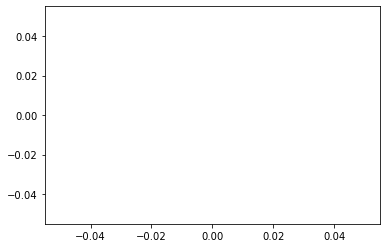

Recipes search: if ingredient, press 'i', if 'dish' press 'd': d
Please enter dish what to search? omelet
Please enter start page number : 10
Please enter end page number > start page : 20
omelet 10 20
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=10
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=11
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=12
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=13
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=14
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=15
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=16
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=17
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=18
Opened url: http://www.recipepuppy.com/api/?q=omelet&p=19
[('eggs', 91), ('salt', 81), ('butter', 50), ('black pepper', 42), ('cheddar cheese', 31), ('onions', 29), ('milk', 23), ('tomato', 21), ('olive oil', 18), ('ham', 17)]
omlete_ingredients.json


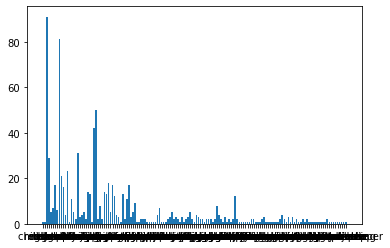

In [5]:








# 1b. Izvelciet 100 receptes, kas satur kartupeļus un sieru no tā paša API
# Atceramies ka šis API datus dod tikai pa 10 vērtībām reizē, līdz ar to vajadzēs lipināt rezultātus kopā.
# Lipināt būs vieglāk jau Python datu strukturu.

potato_cheese = get_recipes()
print(f"Collected recipes: {len(potato_cheese)}")

# 1c Python datu struktūrā pārvērtiet ingredients atslēgas vērtību uz sarakstu.
# Citiem vārdiem saskaldiet string ar sastāvdaļam -> uz list
# Saglabājiet .json failā jauno struktūru

merged_ingr_list(potato_cheese)

with open("ingredients.json", mode = "w") as write_file:
    json.dump(merged_ingr_list(potato_cheese), write_file, indent = 4)
print("ingredients.json")

# 1d Atrodied visvairāk izmantotos ingredients kopā ar kartupeļiem un sieru.
# Ieteikums: Varat izmantot counter update metodi
# Izdrukājiet TOP 3 sastāvdaļas šajās receptēs.

ingrd_count = Counter([ingr for ingr in merged_ingr_list(potato_cheese)])
print(ingrd_count.most_common()[2:5]) # izņemot kartupeļus, sieru, jo tie ir katrā receptē un būs visvairāk,jo nāk no meklētāja

# 1.e uzzīmējiet histogrammu ar ingredients skaitu kuri tiek izmantoti kartupeļu un siera receptēs(100 receptēs).
plt.bar(ingrd_count.keys(), ingrd_count.values())
plt.show()

# 1.f kā būtu ar sastāvdaļām omelet histogrammu ?

omlete = get_recipes()
merged_ingr_list(omlete)
ingrd_count = Counter([ingr for ingr in merged_ingr_list(omlete)])
# create file
with open("omlete_ingredients.json", mode = "w") as write_file:
    json.dump(merged_ingr_list(omlete), write_file, indent = 4)
print(ingrd_count.most_common()[:10])
print("omlete_ingredients.json")

# diagramma
plt.bar(ingrd_count.keys(), ingrd_count.values())
plt.show()



In [7]:
translator = Translator()

In [8]:
translations = translator.translate("omlete")

In [9]:


print(translations)

Translated(src=lv, dest=en, text=omelette, pronunciation=omelette, extra_data="{'translat...")


In [10]:
translations.pronunciation

'omelette'

In [11]:
translations.text

'omelette'

In [12]:
translations.src

'lv'

In [13]:
favorite = translator.translate("Man garšo kartupeļi")

In [14]:
favorite.text

'I like potatoes'

In [ ]:
favorite